In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen
import pprint

In [2]:
constructors_points = []
constructor_name = []
round_ = []

In [3]:
for f1_round in list(range(1,17)):
    
    
    
    url = "http://ergast.com/api/f1/2022/{}/constructorStandings.json?limit=100000&offset=0"
    r = requests.get(url.format(f1_round))

    data = r.json()
    
    useful_data = data['MRData']['StandingsTable']['StandingsLists']
    useful_data = useful_data[0]
    constructor_points = useful_data['ConstructorStandings']
    
    #pprint.pprint(constructor_points[0])        
    
   
    for team in range(10):
        
        round_info = constructor_points[team]
        #pprint.pprint(round_info)
        
        
        #pprint.pprint(round_info['Constructor']['constructorId'])
        
        constructors_points.append(int(round_info['points']))
        constructor_name.append(round_info['Constructor']['constructorId'])
        round_.append(f1_round)
        
        
        

        
        


    

In [4]:
#Construction Points
c_p  = pd.DataFrame()
c_p['round'] = round_
c_p['team'] = constructor_name
c_p['points'] = constructors_points

In [5]:
c_p

,round,team,points
0,1,ferrari,44
1,1,mercedes,27
2,1,haas,10
3,1,alfa,9
4,1,alpine,8
...,...,...,...
155,16,alfa,52
156,16,haas,34
157,16,alphatauri,33
158,16,aston_martin,25


In [6]:
def define_team_color(team):
    
    if team == 'ferrari' :
        color = (255/255,   45/255,  0 /255)

        
    elif team == 'red_bull':
        color = (16/255,   0/255,  255/255)

        
    elif  team == 'mercedes':
        color = (11/255,   214/255,  197/255)

        
    elif  team == 'haas':
        color = (0/255,  0/255,  0/255)

        
    elif team == 'alphatauri':
        color = (178/255,   196/255,  213/255)

    elif  team == 'alpine':
        color = (255/255,   0/255,  209/255)
        
    elif  team == 'williams':
        color = (87/255,   139/255,  187/255)

        
    elif  team == 'alfa':
        color = (155/255,   42/255,  42/255)

        
    elif team == 'aston_martin' :
        color = (14/255,   98/255,  15/255)

        
    elif team == 'mclaren' :
        color = (255/255,   142/255,  0/255)

    else:
        print('none!')
    
    return color

In [7]:
color_aux = define_team_color('alpine')
color_aux 

(1.0, 0.0, 0.8196078431372549)

<Figure size 432x288 with 0 Axes>

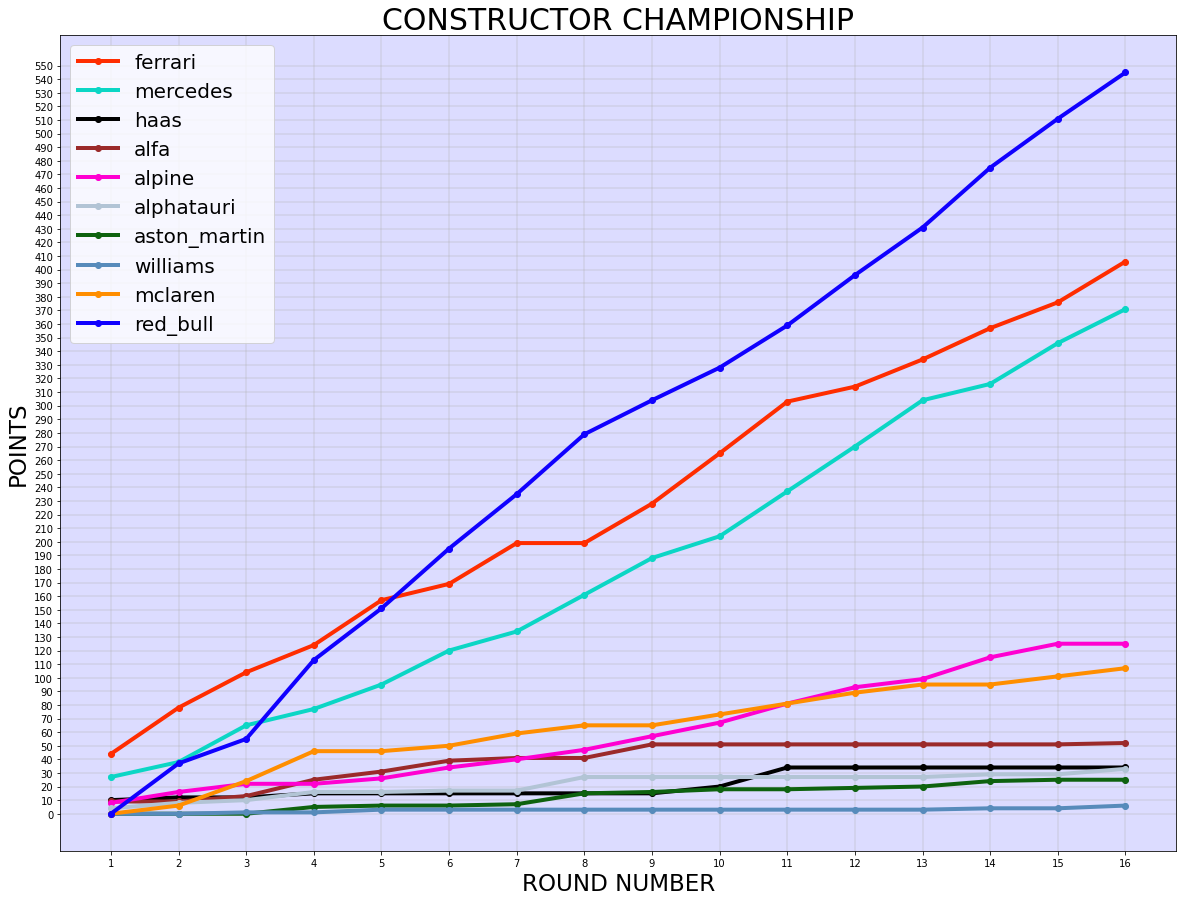

In [8]:
team_names = c_p['team'].unique()
rounds = c_p['round'].unique()


fig = plt.figure()
fig, ax = plt.subplots()
    
fig.set_figheight(15)
fig.set_figwidth(20)

for team in team_names:


    team_info = c_p[c_p['team'] == team]
    puntos = team_info.iloc[:,2].tolist()
    
    color_aux = define_team_color(team)
    plt.plot(rounds,puntos, linewidth=4,marker='o', linestyle="-",color = color_aux,label =team)
    
plt.title('CONSTRUCTOR CHAMPIONSHIP',size = 30)
ax.set_ylabel('POINTS',color = 'BLACK',fontsize = 23)
ax.set_xlabel('ROUND NUMBER', fontsize = 23)
plt.legend(fontsize=20)
ax.grid(axis='both', linewidth=0.45)
plt.yticks(np.arange(0,560, step=10));
plt.xticks(np.arange(1, 17, step=1));
ax.set_facecolor((220/255,220/255 ,255/255  ))
plt.show()
    

In [9]:
def liner_fitting(data_x,data_y):
    size = len(data_x)
    i = 0
    sum_xy=0
    sum_y=0
    sum_x=0
    sum_sqare_x=0
    average_x=0;
    average_y=0;
    while i<size:
        sum_xy+=data_x[i]*data_y[i];
        sum_y+=data_y[i]
        sum_x+=data_x[i]
        sum_sqare_x+=data_x[i]*data_x[i]
        i+=1
    average_x=sum_x/size
    average_y=sum_y/size
    return_k=(size*sum_xy-sum_x*sum_y)/(size*sum_sqare_x-sum_x*sum_x)
    return_b=average_y-average_x*return_k
    return [return_k,return_b]

In [10]:
rounds= c_p['round'].unique()

team_info = c_p[c_p['team'] ==  'ferrari']
puntos_ferrari = team_info.iloc[:,2].tolist()

team_info = c_p[c_p['team'] ==  'red_bull']
puntos_red_bull = team_info.iloc[:,2].tolist()

team_info = c_p[c_p['team'] ==  'mercedes']
puntos_mercedes = team_info.iloc[:,2].tolist()

In [11]:
parametros_ferrari = liner_fitting(rounds, puntos_ferrari)
parametros_red_bull = liner_fitting(rounds, puntos_red_bull)
parametros_mercedes = liner_fitting(rounds, puntos_mercedes)



In [12]:
x = range(1,23)
print(x)

range(1, 23)


<Figure size 432x288 with 0 Axes>

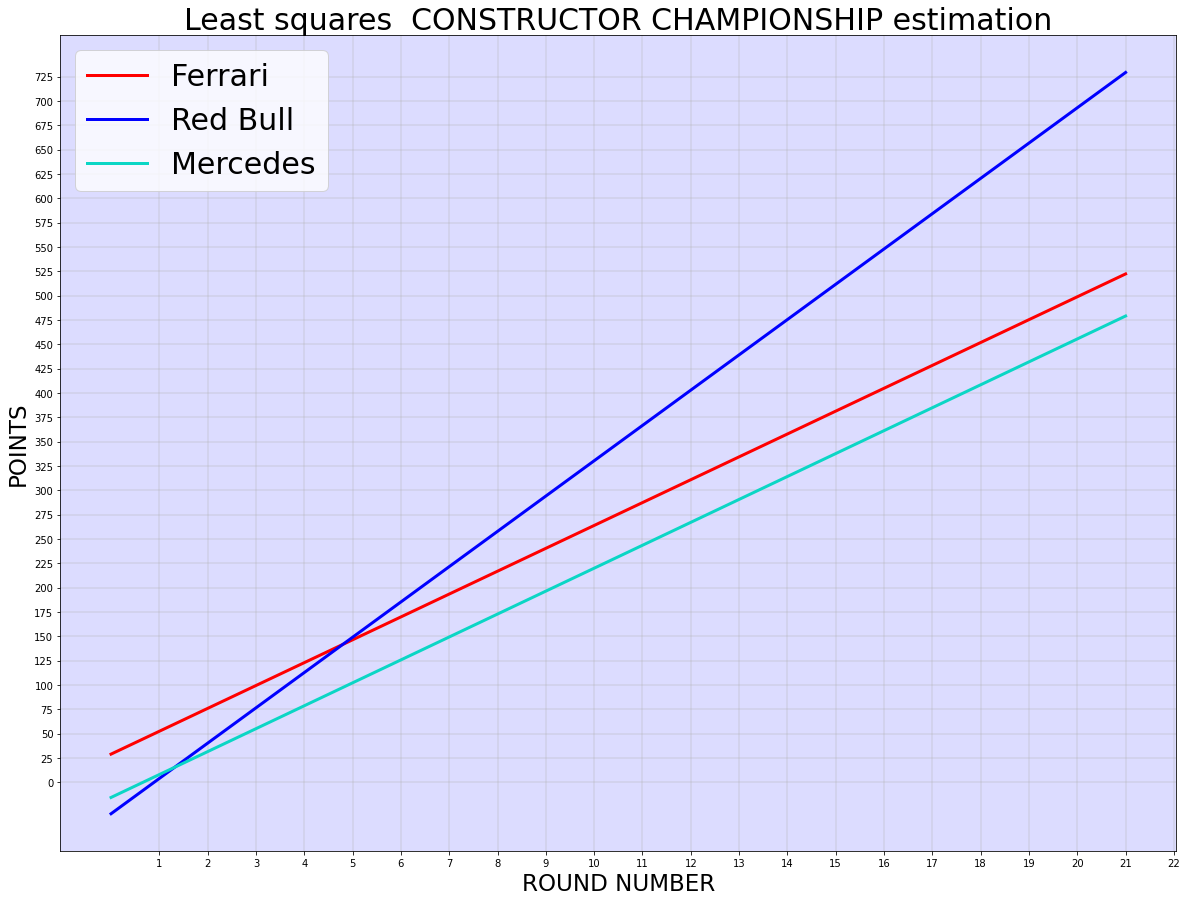

<Figure size 432x288 with 0 Axes>

In [13]:
def ferrari(x):
    return parametros_ferrari[0]*x + parametros_ferrari[1]

def red_bull(x):
    return parametros_red_bull[0]*x + parametros_red_bull[1]

def mercedes(x):
    return parametros_mercedes[0]*x + parametros_mercedes[1]


x = range(22)
fig = plt.figure()
fig, ax = plt.subplots()
    
fig.set_figheight(15)
fig.set_figwidth(20)
plt.plot(x, ferrari(x), color='red',label = 'Ferrari',linewidth = 3)
plt.plot(x, red_bull(x), color='blue',label = 'Red Bull',linewidth = 3)
plt.plot(x, mercedes(x), color=(11/255,   214/255,  197/255),label = 'Mercedes',linewidth = 3)


plt.title('Least squares  CONSTRUCTOR CHAMPIONSHIP estimation',size = 30)
ax.set_ylabel('POINTS',color = 'BLACK',fontsize = 23)
ax.set_xlabel('ROUND NUMBER', fontsize = 23)
plt.legend(fontsize = 30)
ax.grid(axis='both', linewidth=0.45)


plt.yticks(np.arange(0,750, step=25));
plt.xticks(np.arange(1, 23, step=1));

plt.figure(facecolor='yellow')

ax.set_facecolor((220/255,220/255 ,255/255  ))

plt.show()

In [14]:
parametros_red_bull

[36.26176470588236, -32.35000000000002]

In [15]:
parametros_ferrari

[23.48970588235294, 28.900000000000006]

In [19]:
print(335+25)

360


In [20]:
print(5*25 + 219)

344


In [23]:
(16-4)/12

1.0